In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\G&T Asesores\Desktop\Indicadores\SUPNT1 TOTAL\PBI IPC T1.xlsx')
df

,NOMENCLATURA,DEUDA,PAGO,EFECTIVIDAD,PBI,IPC
0,202012SUPNT1,1.187237e+06,764853.45,64.423000,191.689968,93.958129
1,202101SUPNT1,2.425175e+06,1694535.64,69.872705,161.077203,94.656145
2,202102SUPNT1,4.209169e+06,2051497.35,48.738778,155.861000,94.537574
3,202103SUPNT1,4.308773e+06,2393471.94,55.548810,165.130455,95.331187
4,202104SUPNT1,5.844861e+06,3313286.93,56.687181,163.546923,95.231383
5,202105SUPNT1,5.289962e+06,2914651.68,55.097779,174.978924,95.485229
6,202106SUPNT1,6.536270e+06,3784816.57,57.904839,172.066790,95.981439
7,202107SUPNT1,5.693511e+06,3198860.23,56.184321,173.686282,96.948490
8,202108SUPNT1,6.609261e+06,3867855.35,58.521750,174.991660,97.903369
9,202109SUPNT1,6.520838e+06,3400043.84,52.141210,178.124904,98.295397


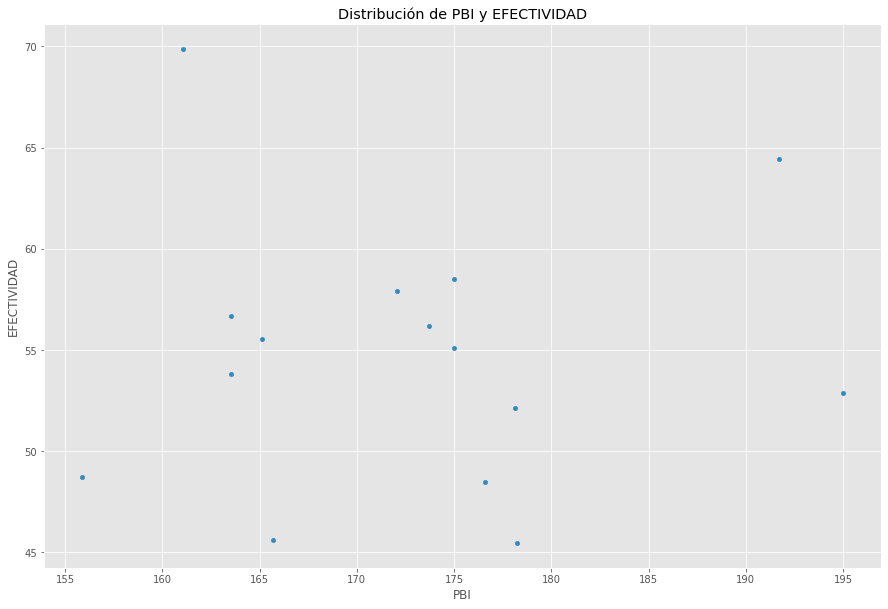

In [19]:
fig, ax = plt.subplots(figsize=(15,10))

df.plot(
    x    = 'PBI',
    y    = 'EFECTIVIDAD',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de PBI y EFECTIVIDAD');

In [10]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df['PBI'], y =  df['EFECTIVIDAD'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.034736395433756985
P-value:  0.9021878881176564


In [11]:
# División de los datos en train y test
# ==============================================================================
X = df[['PBI']]
y = df['EFECTIVIDAD']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [13]:
# Información del modelo
# ==============================================================================
print("Intercepto:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercepto: [81.24180928]
Coeficiente: [('PBI', -0.15176200356968458)]
Coeficiente de determinación R^2: -0.08109915850191896


In [22]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[56.09829354]
 [54.4428931 ]
 [52.15055574]]

El error (rmse) de test es: 9.941050480681387


In [23]:
# División de los datos en train y test
# ==============================================================================
X = df[['PBI']]
y = df['EFECTIVIDAD']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [24]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.7566
Date:                Fri, 13 May 2022   Prob (F-statistic):              0.405
Time:                        16:47:49   Log-Likelihood:                -37.480
No. Observations:                  12   AIC:                             78.96
Df Residuals:                      10   BIC:                             79.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.2418     29.948      2.713      0.0

In [25]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[ 14.5144245 , 147.96919406],
       [ -0.54052326,   0.23699925]])

In [26]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,51.649117,4.476559,41.674721,61.623512,34.928223,68.370011
1,56.428314,2.213245,51.496898,61.359730,42.130811,70.725817
2,57.588032,3.213712,50.427435,64.748628,42.377053,72.799010
3,54.189129,2.115385,49.475757,58.902500,39.965360,68.412898


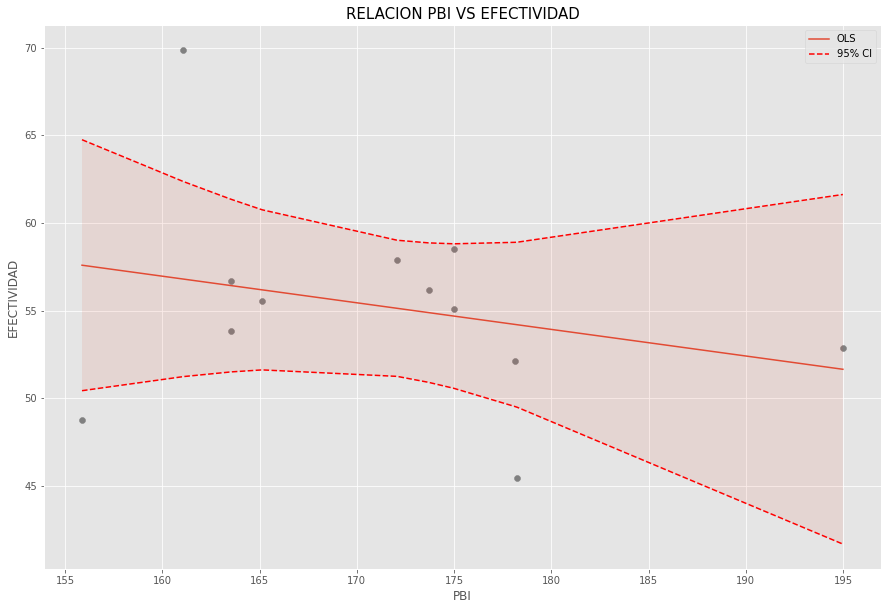

In [31]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend()
plt.xlabel("PBI",fontsize=12)
plt.ylabel("EFECTIVIDAD",fontsize=12)
plt.title("RELACION PBI VS EFECTIVIDAD",fontsize=15)
plt.show()

In [29]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 9.941050480681374


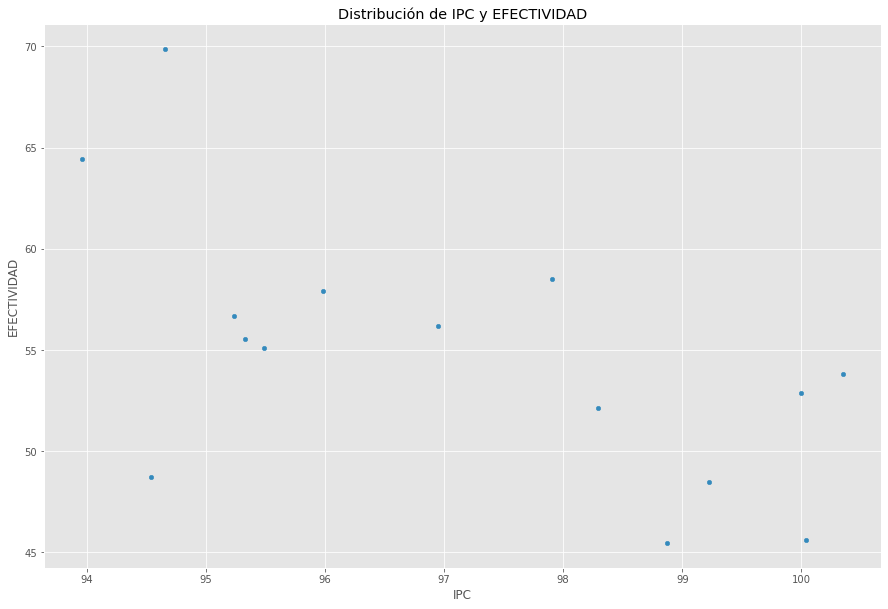

In [4]:
fig, ax = plt.subplots(figsize=(15,10))

df.plot(
    x    = 'IPC',
    y    = 'EFECTIVIDAD',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de IPC y EFECTIVIDAD');

In [5]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df['IPC'], y =  df['EFECTIVIDAD'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.6113774568212245
P-value:  0.01544970200082749


In [7]:
# División de los datos en train y test
# ==============================================================================
X = df[['IPC']]
y = df['EFECTIVIDAD']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [8]:
# Información del modelo
# ==============================================================================
print("Intercepto:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercepto: [168.95752488]
Coeficiente: [('IPC', -1.1727898400067418)]
Coeficiente de determinación R^2: 0.3260196071219209


In [9]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[51.63476438]
 [52.58951073]
 [58.76438631]]

El error (rmse) de test es: 5.335658392835298


In [10]:
# División de los datos en train y test
# ==============================================================================
X = df[['PBI']]
y = df['EFECTIVIDAD']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [11]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.7566
Date:                Mon, 16 May 2022   Prob (F-statistic):              0.405
Time:                        17:53:24   Log-Likelihood:                -37.480
No. Observations:                  12   AIC:                             78.96
Df Residuals:                      10   BIC:                             79.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.2418     29.948      2.713      0.0

In [12]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[ 14.5144245 , 147.96919406],
       [ -0.54052326,   0.23699925]])

In [13]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,51.649117,4.476559,41.674721,61.623512,34.928223,68.370011
1,56.428314,2.213245,51.496898,61.359730,42.130811,70.725817
2,57.588032,3.213712,50.427435,64.748628,42.377053,72.799010
3,54.189129,2.115385,49.475757,58.902500,39.965360,68.412898


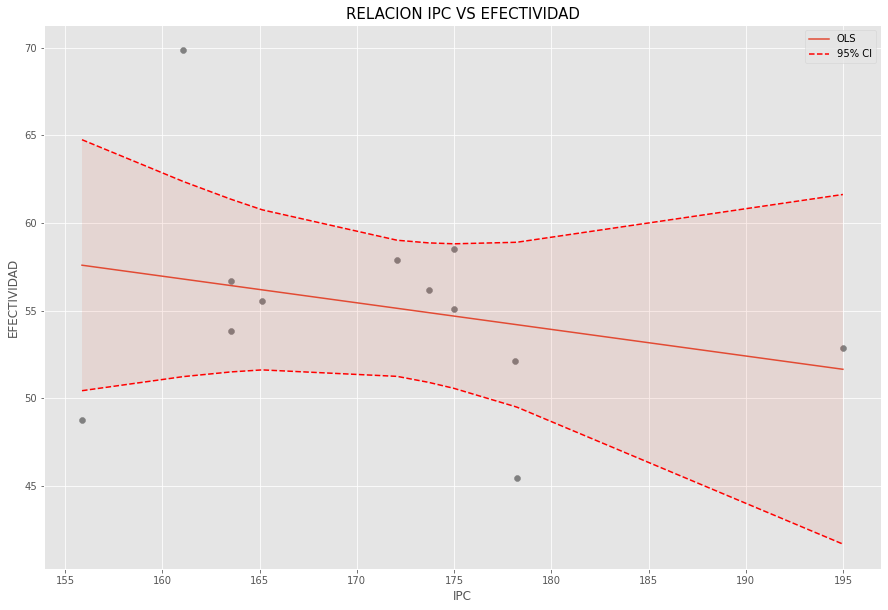

In [15]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend()
plt.xlabel("IPC",fontsize=12)
plt.ylabel("EFECTIVIDAD",fontsize=12)
plt.title("RELACION IPC VS EFECTIVIDAD",fontsize=15)
plt.show()

In [16]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 9.941050480681374
